In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('font', family = 'Malgun Gothic')
matplotlib.rcParams['axes.unicode_minus'] = False
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')# 데이터 구성 패키지:Series, DataFrame

# scaling
from sklearn.preprocessing import StandardScaler
# 로지스틱 분석 패키지
from statsmodels.api import Logit
# 데이터 분할, 의사결정나무, 랜덤포레스트 모델
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
# 그래디언트 부스팅
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
# 분류 SVM
from sklearn.svm import SVC
# 분류 NN (MPLClassifier)
from sklearn.neural_network import MLPClassifier
# 평가 함수
from sklearn.metrics import accuracy_score

# confusion matrix
from sklearn.metrics import confusion_matrix
# 분류모델 평가함수
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import plot_tree

In [10]:
df = pd.read_csv('Telemarketing_data_last.csv', encoding='cp949')
df_card = pd.read_csv('Card_Data_1(20210904_220136).csv', encoding='cp949')
df_age_card = pd.read_csv('age_card.csv', encoding='cp949')

In [11]:
df.head()

,연령,직업군,결혼여부,학력,신용카드소지여부,주택대출여부,개인대출여부,contact,통화시간,연락시도횟수,p_days,과거통화횟수,계약여부,카드종류,연락요일
0,56,주부,결혼,중졸,없음,없음,없음,유선전화,261,1,NaN,0,no,87,수요일
1,57,서비스종사자,결혼,전문학교,미확인,없음,없음,유선전화,149,1,NaN,0,no,88,수요일
2,37,서비스종사자,결혼,전문학교,없음,대출있음,없음,유선전화,226,1,NaN,0,no,89,수요일
3,40,회사원,결혼,검정고시,없음,없음,없음,유선전화,151,1,NaN,0,no,90,수요일
4,56,서비스종사자,결혼,전문학교,없음,없음,대출있음,유선전화,307,1,NaN,0,no,91,수요일


In [12]:
df_age_card.head()

,연령대,사용카드,사용횟수
0,10대,34,309
1,10대,36,295
2,10대,35,291
3,20대,218,759
4,20대,217,590


In [13]:
age_10 = df_age_card[df_age_card['연령대']=='10대']['사용카드'].tolist()
age_20 = df_age_card[df_age_card['연령대']=='20대']['사용카드'].tolist()
age_30 = df_age_card[df_age_card['연령대']=='30대']['사용카드'].tolist()
age_40 = df_age_card[df_age_card['연령대']=='40대']['사용카드'].tolist()
age_50 = df_age_card[df_age_card['연령대']=='50대']['사용카드'].tolist()
age_60 = df_age_card[df_age_card['연령대']=='60대']['사용카드'].tolist()
age_70 = df_age_card[df_age_card['연령대']=='70대']['사용카드'].tolist()
age_80 = df_age_card[df_age_card['연령대']=='80대']['사용카드'].tolist()
age_90 = df_age_card[df_age_card['연령대']=='90대']['사용카드'].tolist()

In [14]:
pre_card = []
for i in range(len(df)):
    if df['Age'][i] == '10대':
        if df['카드종류'][i] in age_10:
            pre_card.append(1)
        else:
            pre_card.append(0)
    elif df['Age'][i] == '20대':
        if df['카드종류'][i] in age_20:
            pre_card.append(1)
        else:
            pre_card.append(0)
    elif df['Age'][i] == '30대':
        if df['카드종류'][i] in age_30:
            pre_card.append(1)
        else:
            pre_card.append(0)
    elif df['Age'][i] == '40대':
        if df['카드종류'][i] in age_40:
            pre_card.append(1)
        else:
            pre_card.append(0)
    elif df['Age'][i] == '50대':
        if df['카드종류'][i] in age_50:
            pre_card.append(1)
        else:
            pre_card.append(0)
    elif df['Age'][i] == '60대':
        if df['카드종류'][i] in age_60:
            pre_card.append(1)
        else:
            pre_card.append(0)
    elif df['Age'][i] == '70대':
        if df['카드종류'][i] in age_70:
            pre_card.append(1)
        else:
            pre_card.append(0)
    elif df['Age'][i] == '80대':
        if df['카드종류'][i] in age_80:
            pre_card.append(1)
        else:
            pre_card.append(0)
    elif df['Age'][i] == '90대':
        if df['카드종류'][i] in age_90:
            pre_card.append(1)
        else:
            pre_card.append(0)
df['pre_card'] = pre_card

KeyError: 'Age'

In [13]:
df.drop('카드종류',axis=1, inplace=True)

In [8]:
df.head()

,연령,직업군,결혼여부,학력,신용카드소지여부,주택대출여부,개인대출여부,contact,통화시간,연락시도횟수,p_days,과거통화횟수,계약여부,카드종류,연락요일
0,56,주부,결혼,중졸,없음,없음,없음,유선전화,261,1,NaN,0,no,87,수요일
1,57,서비스종사자,결혼,전문학교,미확인,없음,없음,유선전화,149,1,NaN,0,no,88,수요일
2,37,서비스종사자,결혼,전문학교,없음,대출있음,없음,유선전화,226,1,NaN,0,no,89,수요일
3,40,회사원,결혼,검정고시,없음,없음,없음,유선전화,151,1,NaN,0,no,90,수요일
4,56,서비스종사자,결혼,전문학교,없음,없음,대출있음,유선전화,307,1,NaN,0,no,91,수요일


In [6]:
df['직업군'].unique()

array(['주부', '서비스종사자', '회사원', '산업노동자', '기술자', '은퇴', '공무원', '미취업자', '자영업자',
       '미확인', '기업가', '학생'], dtype=object)

In [7]:
df.head()

,연령,직업군,결혼여부,학력,신용카드소지여부,주택대출여부,개인대출여부,contact,통화시간,연락시도횟수,p_days,과거통화횟수,계약여부,카드종류,연락요일
0,56,주부,결혼,중졸,없음,없음,없음,유선전화,261,1,NaN,0,no,87,수요일
1,57,서비스종사자,결혼,전문학교,미확인,없음,없음,유선전화,149,1,NaN,0,no,88,수요일
2,37,서비스종사자,결혼,전문학교,없음,대출있음,없음,유선전화,226,1,NaN,0,no,89,수요일
3,40,회사원,결혼,검정고시,없음,없음,없음,유선전화,151,1,NaN,0,no,90,수요일
4,56,서비스종사자,결혼,전문학교,없음,없음,대출있음,유선전화,307,1,NaN,0,no,91,수요일


In [40]:
df["계약여부"] = np.where(df["계약여부"] == "no", 0, 1)
df_train, df_test = train_test_split(df, test_size = 0.3, random_state = 1234)

print("train data shape: ", df_train.shape)
print("test data shape: ", df_test.shape)

train data shape:  (28831, 18)
test data shape:  (12357, 18)


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   결혼여부      41188 non-null  object
 1   학력        41188 non-null  object
 2   신용카드소지여부  41188 non-null  object
 3   주택대출여부    41188 non-null  object
 4   개인대출여부    41188 non-null  object
 5   contact   41188 non-null  object
 6   연락시도횟수    41188 non-null  int64 
 7   과거통화횟수    41188 non-null  int64 
 8   계약여부      41188 non-null  int32 
 9   통화시간대     41184 non-null  object
 10  Age       41188 non-null  object
 11  재연락       41188 non-null  int64 
 12  혜택분야      41188 non-null  object
 13  카드명       41188 non-null  object
 14  가족카드여부    41188 non-null  int64 
 15  pre_card  41188 non-null  int64 
 16  job       41188 non-null  object
 17  연락요일      41188 non-null  object
dtypes: int32(1), int64(5), object(12)
memory usage: 5.5+ MB


In [42]:
# from_formula 함수를 이용하여 변수 역할 지정
log_model = Logit.from_formula("""계약여부 ~ C(결혼여부) + C(학력) + C(신용카드소지여부) + C(주택대출여부) + C(개인대출여부) + C(contact) + C(가족카드여부) + C(재연락) + 과거통화횟수 +연락시도횟수 + C(통화시간대) + C(Age) + C(연락요일) + C(혜택분야) + C(pre_card) + C(job)""", df_train)

# 적합
log_result = log_model.fit()

# 결과 출력
print(log_result.summary())

         Current function value: 0.235537
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                   계약여부   No. Observations:                28829
Model:                          Logit   Df Residuals:                    28780
Method:                           MLE   Df Model:                           48
Date:                Wed, 08 Sep 2021   Pseudo R-squ.:                  0.3326
Time:                        15:45:29   Log-Likelihood:                -6790.3
converged:                      False   LL-Null:                       -10174.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -1.7353      0.335     -5.185      0.000      -2.391      -1.079
C(결혼여부)[T.미혼]       

Text(0.5, 0, '변수 중요도')

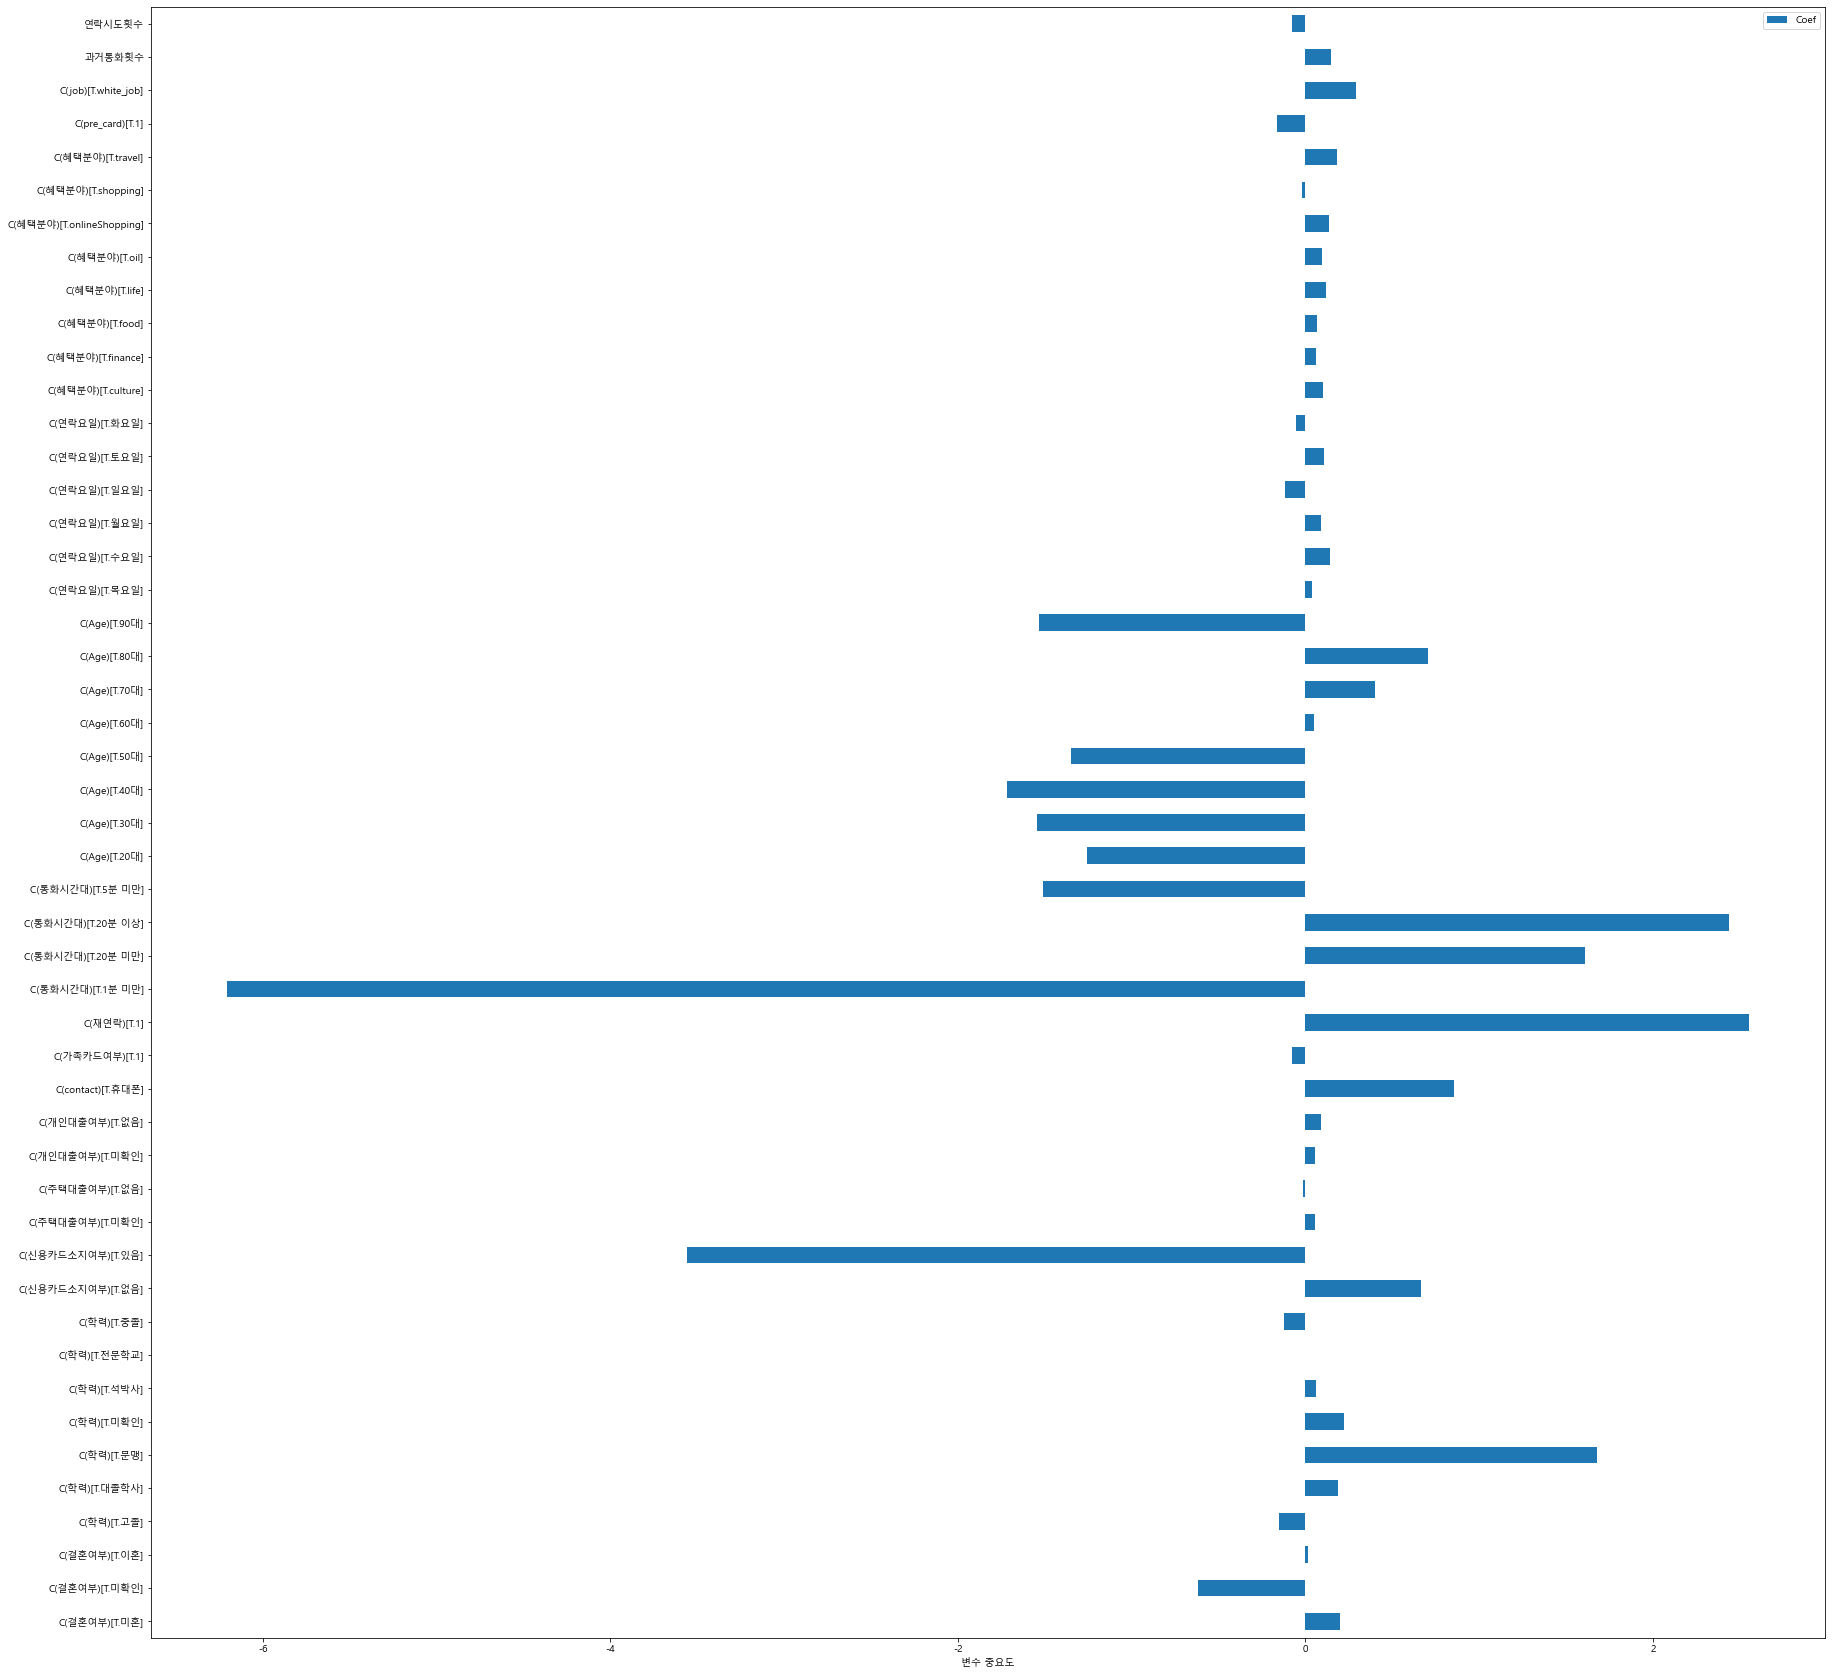

In [43]:
df_logistic_coef = pd.DataFrame({'Coef' : log_result.params.values[1:]}, index = log_model.exog_names[1:])
df_logistic_coef.plot.barh(y='Coef', figsize=(30,30))
plt.xlabel('변수 중요도')

In [45]:
df_logistic_coef.sort_values('Coef', ascending=False)

,Coef
C(재연락)[T.1],2.553942
C(통화시간대)[T.20분 이상],2.437459
C(학력)[T.문맹],1.680707
C(통화시간대)[T.20분 미만],1.607328
C(contact)[T.휴대폰],0.853351
C(Age)[T.80대],0.707101
C(신용카드소지여부)[T.없음],0.665497
C(Age)[T.70대],0.398977
C(job)[T.white_job],0.292651
C(학력)[T.미확인],0.222934


In [ ]:
df_x.columns

In [46]:
df_x = df.drop(['계약여부','카드명'], axis=1)
df_y = df['계약여부']
df_x_dum = pd.get_dummies(df_x)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x_dum, df_y, test_size = 0.3, random_state = 1234)

tree_uncustomized = DecisionTreeClassifier(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)

print('Score on training set : {:.3f}'.format(tree_uncustomized.score(df_train_x, df_train_y)))
print('Score on test set : {:.3f}'.format(tree_uncustomized.score(df_test_x, df_test_y)))

Score on training set : 0.996
Score on test set : 0.865


<Figure size 1080x720 with 0 Axes>

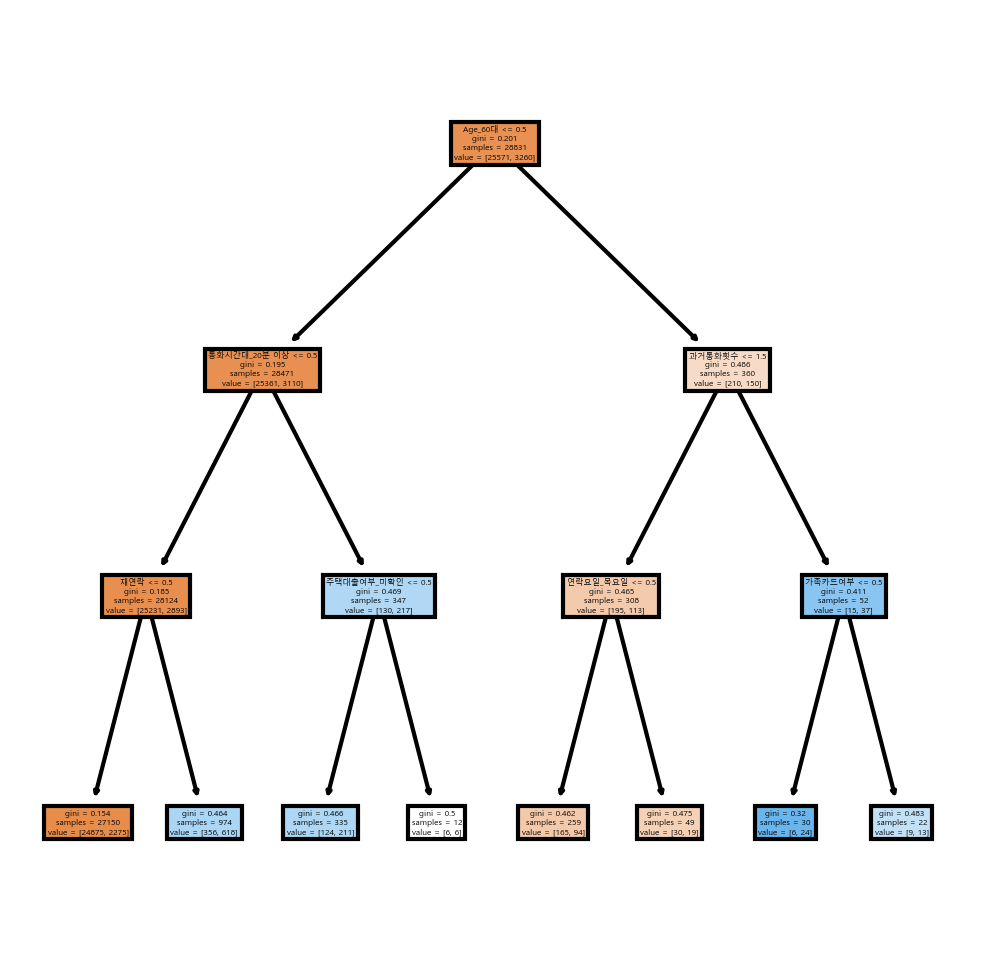

In [47]:
tree_final = DecisionTreeClassifier(random_state=1234,  min_samples_leaf=10, min_samples_split=10, max_depth = 3, max_features='sqrt')
tree_final.fit(df_train_x, df_train_y)
plt.figure(figsize=(15,10))
v_feature_name = df_train_x.columns
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(tree_final, feature_names = v_feature_name, filled = True);

In [48]:
nn_uncustomized = MLPClassifier(random_state=1234)
nn_uncustomized.fit(df_train_x, df_train_y)
print(nn_uncustomized.score(df_train_x, df_train_y))
print(nn_uncustomized.score(df_test_x, df_test_y))

0.9437064271097083
0.8920449947398236


In [49]:
para_hidden = [20 * hidden for hidden in range(1,9)]
para_function = ['logistic', 'tanh', 'relu']
para_solver = ['lbfgs', 'sgd', 'adam']
para_batch = [20*batch for batch in range(1,10)]

Text(0.5, 1.0, 'hidden_layer_sizes')

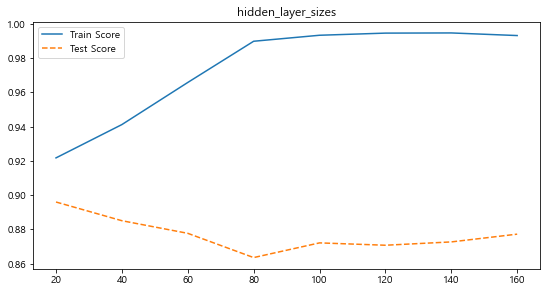

In [50]:
train_score = []; test_score = []

for v_hidden in para_hidden:
    nn = MLPClassifier(hidden_layer_sizes = (v_hidden, v_hidden), random_state = 1234)
    nn.fit(df_train_x, df_train_y)
    train_score.append(nn.score(df_train_x, df_train_y))
    test_score.append(nn.score(df_test_x, df_test_y))

plt.figure(figsize=(20,10))    # 시각화를 통해 최적 값 도출
plt.subplot(2,2,1)    
plt.plot(para_hidden, train_score, linestyle='-', label = 'Train Score')
plt.plot(para_hidden, test_score, linestyle='--', label = 'Test Score')
plt.legend()
plt.title('hidden_layer_sizes')

Text(0.5, 1.0, 'activation')

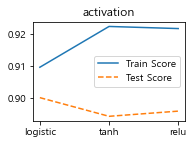

In [51]:
train_score = []; test_score = []

for v_function in para_function:
    nn = MLPClassifier(hidden_layer_sizes = (20,20), activation = v_function, random_state = 1234)
    nn.fit(df_train_x, df_train_y)
    train_score.append(nn.score(df_train_x, df_train_y))
    test_score.append(nn.score(df_test_x, df_test_y))

plt.subplot(2,2,2)
plt.plot(para_function, train_score, linestyle='-', label = 'Train Score')
plt.plot(para_function, test_score, linestyle='--', label = 'Test Score')
plt.legend()
plt.title('activation')

Text(0.5, 1.0, 'solver')

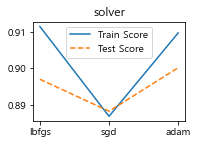

In [53]:
train_score = []; test_score = []

for v_solver in para_solver:
    nn = MLPClassifier(hidden_layer_sizes = (20,20), activation = 'logistic', solver = v_solver, random_state = 1234)
    nn.fit(df_train_x, df_train_y)
    train_score.append(nn.score(df_train_x, df_train_y))
    test_score.append(nn.score(df_test_x, df_test_y))

plt.subplot(2,2,3)
plt.plot(para_solver, train_score, linestyle='-', label = 'Train Score')
plt.plot(para_solver, test_score, linestyle='--', label = 'Test Score')
plt.legend()
plt.title('solver')

In [56]:
train_score = []; test_score = []

for v_batch in para_batch:
    nn = MLPClassifier(hidden_layer_sizes = (20,20), activation = 'logistic', solver = 'adam', random_state = 1234, batch_size = v_batch)
    nn.fit(df_train_x, df_train_y)
    train_score.append(nn.score(df_train_x, df_train_y))
    test_score.append(nn.score(df_test_x, df_test_y))

In [63]:
!pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.8.0-py3-none-any.whl (206 kB)


In [58]:
nn_final = MLPClassifier(batch_size = 120, solver = 'adam', hidden_layer_sizes = (20,20), random_state = 1234, activation = 'logistic')
nn_final.fit(df_train_x, df_train_y)
y_pred = nn_final.predict(df_test_x)

print('Accuracy on training set : {}'.format(nn_final.score(df_train_x, df_train_y)))
print('Accuracy on test set : {:.3f}'.format(nn_final.score(df_test_x, df_test_y)))

print(classification_report(df_test_y, y_pred, digits=3))

Accuracy on training set : 0.9128021920849086
Accuracy on test set : 0.900
              precision    recall  f1-score   support

           0      0.923     0.968     0.945     10977
           1      0.587     0.361     0.447      1380

    accuracy                          0.900     12357
   macro avg      0.755     0.664     0.696     12357
weighted avg      0.886     0.900     0.890     12357

